In [1]:
import matplotlib.pyplot as plt
import sklearn 
import numpy as np

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)
X, y = mnist.data, mnist.target

c:\Users\tanda\ML\venv\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
X_train, y_train, X_test, y_test = X[:60000], y[:60000], X[60000:], y[60000:]

Turn out, reshape() do not change the function in-place and return None.<br/>
Instead, it copies the dataframe and return the transformed one.

In [10]:
from scipy.ndimage import shift
def shift_image(image: np.ndarray, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dx, dy], mode='constant', cval=0)
    return shifted_image.reshape([-1])

Plot some digit to test shifted function

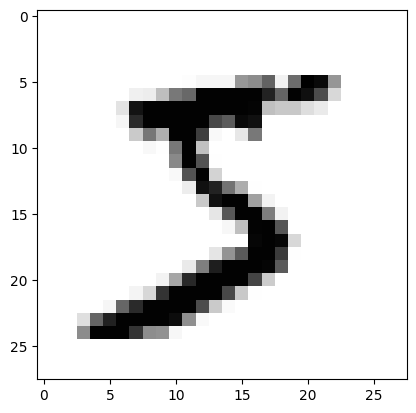

In [12]:
some_digit = X_train[0]
some_digit_down = shift_image(some_digit, 0, -1)
plt.imshow(some_digit_down.reshape((28, 28)), 
           interpolation='nearest', cmap='Greys')

Create a new train set using data augmentation or training set expansion. <br>
This technique change the train set a little, which still remains its property as a valid train example. <br>
In this exercise, we shift an image a little bit, which ensure it to remain a valid photo of number.

In [14]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for (dx, dy) in [(0, 1), (0, -1), (1, 0), (-1, 0)]:
    for (image, label) in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [15]:
random_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[random_idx]
y_train_augmented = y_train_augmented[random_idx]

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=4, weights='distance')
knn_clf.fit(X_train_augmented, y_train_augmented)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [18]:
augmented_score = knn_clf.score(X_test, y_test)

0.9763